<a href="https://colab.research.google.com/github/DexterfreaK/SimpleFaceDetection/blob/main/faceDetectionAndCenterCropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [33]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def findface(filename):
  # Read the input image
  image = cv2.imread(filename)
  # Convert into grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  for (x, y, w, h) in faces:
      center_x = x + w // 2
      center_y = y + h // 2
      side_length = max(w, h)

      # Calculate the coordinates of the square crop
      x1 = center_x - side_length // 2
      y1 = center_y - side_length // 2
      x2 = x1 + side_length
      y2 = y1 + side_length

      # Ensure the crop is within the image boundaries
      x1 = max(0, x1)
      y1 = max(0, y1)
      x2 = min(x2, image.shape[1])
      y2 = min(y2, image.shape[0])

      # Crop the face region from the original image
      face_crop = image[y1:y2, x1:x2]

      # Convert the OpenCV image to PIL/Pillow format
      face_crop = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
      face_crop = Image.fromarray(face_crop)

      # Display the center-cropped face
      plt.figure()
      plt.imshow(face_crop)
      plt.axis('off')
      plt.show()
      break;

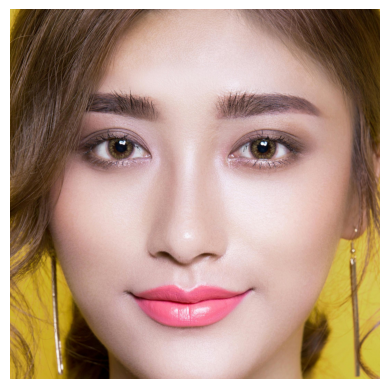

In [ ]:
findface("d3.jpeg")

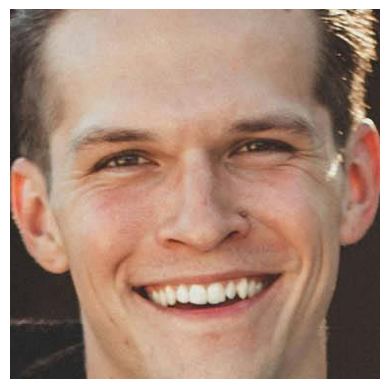

In [ ]:
findface("d4.jpeg")

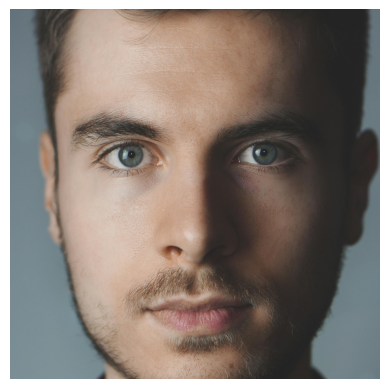

In [ ]:
findface("data1.jpeg")